In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

#Datasets generation
from sklearn.datasets import make_circles, make_blobs, make_classification

#Classification models
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier as RFc
from sklearn.tree import DecisionTreeClassifier as DTc
from sklearn.svm import SVC as SVMc
from sklearn.neural_network import MLPClassifier as MLPc

#GridSearch
from sklearn.model_selection import GridSearchCV

#Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_classifier_boundary(model,x,h = .05): #kindly provided in class
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = x[:, 0].min()-.2, x[:, 0].max()+.2
    y_min, y_max = x[:, 1].min()-.2, x[:, 1].max()+.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))
cmap = colors.ListedColormap(['blue','orange'])

In [3]:
def Test_models(x, y, clusters=2):
    models = [LR(), LDA(), QDA(), RFc(), DTc(), SVMc(kernel='rbf'), 
              SVMc(kernel='poly'), MLPc(activation='relu'), MLPc(activation='tanh')]
    modls = ['LR','LDA','QDA','RFc','DTc','SVMc_rbf','SVMc_poly','MLPc_relu','MLPc_tanh']
    
    grid_params_DTc = {'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 10),
        'min_samples_split': range(1, 10),
        'min_samples_leaf': range(1, 5) }    
    grid_params_RFc = {"n_estimators": [10, 50, 100, 200],
             "criterion": ['gini', 'entropy'],
             "min_samples_split": [2, 5, 10, 20],
             "min_samples_leaf": [1, 2 , 5 , 10],
             "min_impurity_decrease": [0.0, 1.0, 2.0]}
    grid_params_SVMc = {'C':[0.001,0.005,0.01,0.05, 0.1,0.5, 1, 5, 10]}
    grid_params_MLPc = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
            'batch_size':[100, 50, 25]}
    if clusters > 2:
        models = models[1:]
        modls = modls[1:]
    fig = plt.figure(figsize=(30,20))
    Acc = []
    F1 = []
    Auc =  []
    T_time = []
    for i in range(len(models)):
        mod = models[i]
        if i == 4:
            grid_mod = GridSearchCV(DTc(), grid_params_DTc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x, y)
            mod = grid_mod.best_estimator_
        elif i == 3:
            grid_mod = GridSearchCV(RFc(random_state=42), grid_params_RFc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x, y)
            mod = grid_mod.best_estimator_
        elif i == 5:
            grid_mod = GridSearchCV(SVMc(kernel='rbf'), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x, y)
            mod = grid_mod.best_estimator_
        elif i == 6:
            grid_mod = GridSearchCV(SVMc(kernel='poly'), grid_params_SVMc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x, y)
            mod = grid_mod.best_estimator_
        elif i == 7:
            grid_mod = GridSearchCV(MLPc(activation='relu'), grid_params_MLPc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')
            grid_mod.fit(x, y)
            mod = grid_mod.best_estimator_
        elif i == 8:
            grid_mod = GridSearchCV(MLPc(activation='tanh'), grid_params_MLPc, verbose=1, cv=5, n_jobs=-1, scoring = 'f1')    
            grid_mod.fit(x, y)
            mod = grid_mod.best_estimator_
        else:
            mod = models[i]
        start = time.time()
        mod.fit(x, y)
        stop = time.time()

        print(mod)
        print('Accuracy:', cross_val_score(mod, x, y, cv=5, scoring=('accuracy')))
        Acc.append(np.mean(cross_val_score(mod, x, y, cv=5, scoring=('accuracy'))))
        print('F1:', cross_val_score(mod, x, y, cv=5, scoring=('f1')))
        F1.append(np.mean(cross_val_score(mod, x, y, cv=5, scoring=('f1'))))
        print('AUC:', cross_val_score(mod, x, y, cv=5, scoring=('roc_auc')))
        Auc.append(np.mean(cross_val_score(mod, x, y, cv=5, scoring=('roc_auc'))))

        print(f"Training time: {stop - start}s")
        T_time.append(stop-start)
        print('\n')

        ax = fig.add_subplot(4, 4, i+1)
        plot_classifier_boundary(mod,x)
        ax.scatter(x[:,0],x[:,1],color=cmap(y))
        ax.set_title(models[i], fontsize = 13)
        ax.set_xlabel('$x1$')
        ax.set_ylabel('$x2$')

    Metrics = [Acc, F1, Auc, T_time]
    Labels = ['Accuracy score', 'F1', 'AUC', 'Training time']
    for i in range(4):
        ax = fig.add_subplot(4, 4, i+13) 
        ax.barh(modls, Metrics[i])
        ax.set_xlabel(Labels[i])
    plt.show() 


LogisticRegression()
Accuracy: [1. 1. 1. 1. 1.]
F1: [1. 1. 1. 1. 1.]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.005983114242553711s


LinearDiscriminantAnalysis()
Accuracy: [1. 1. 1. 1. 1.]
F1: [1. 1. 1. 1. 1.]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.0019919872283935547s


QuadraticDiscriminantAnalysis()
Accuracy: [1. 1. 1. 1. 1.]
F1: [1. 1. 1. 1. 1.]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.0009970664978027344s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=10, random_state=42)
Accuracy: [1. 1. 1. 1. 1.]
F1: [1. 1. 1. 1. 1.]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.010970830917358398s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(max_depth=1)
Accuracy: [1. 1. 1. 1. 1.]
F1: [1. 1. 1. 1. 1.]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.000997304916381836s


Fitting 5 folds for each of 45 candidates, totalling 225 fits
SVC(C=0.001, gamma=0.0001)
Accuracy: [1. 1. 1. 1. 1.]
F1: [1. 1. 1. 1. 1.]
AUC: [1. 1. 1

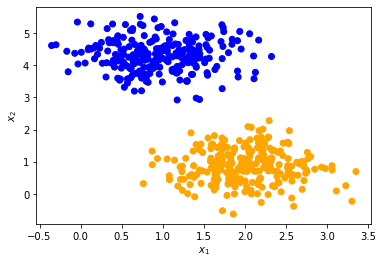

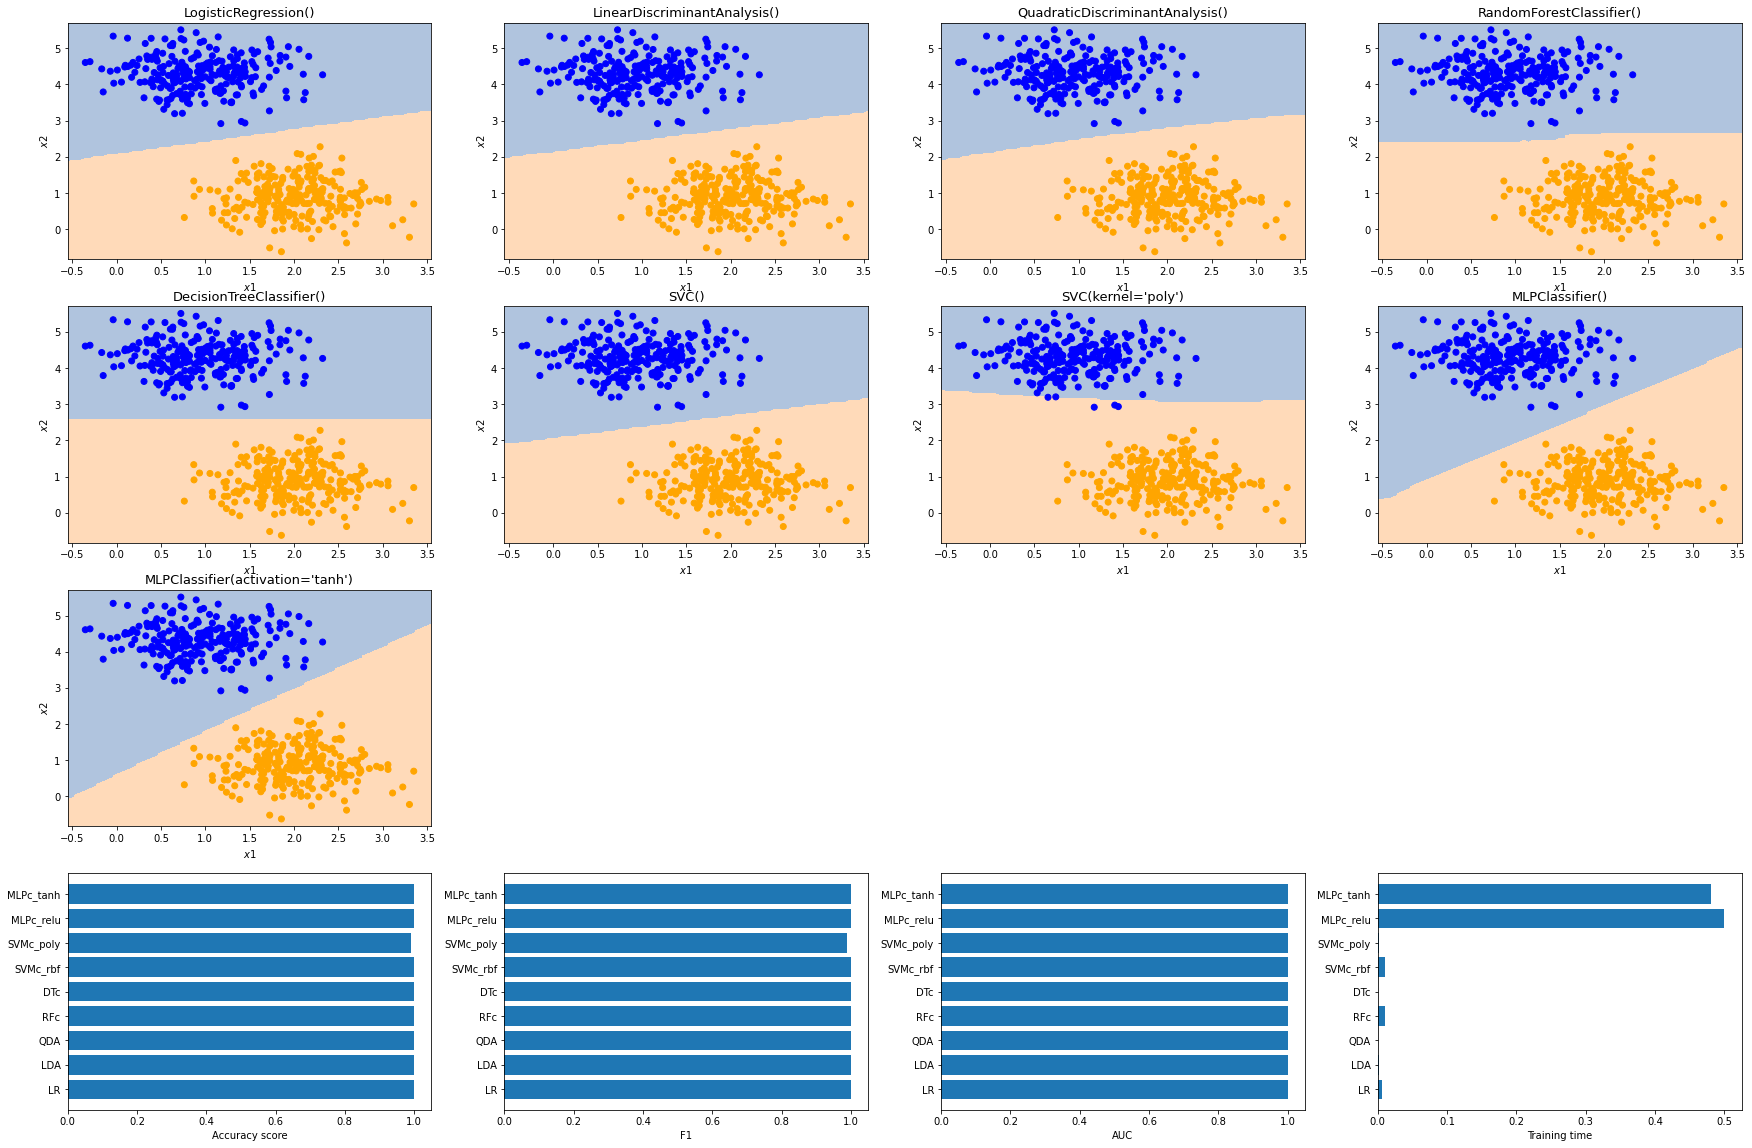

In [4]:
x, y = make_blobs(n_samples=500, centers=2, n_features=2, 
                  cluster_std=0.5, random_state=0)
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Accuracy: [0.95 0.95 0.96 0.98 0.98]
F1: [0.94949495 0.95145631 0.96       0.98       0.97959184]
AUC: [0.9948 0.99   0.9932 0.9928 0.9988]
Training time: 0.003957271575927734s


LinearDiscriminantAnalysis()
Accuracy: [0.95 0.95 0.96 0.97 0.98]
F1: [0.94949495 0.95145631 0.96       0.96969697 0.97959184]
AUC: [0.994  0.9916 0.9936 0.9928 0.9984]
Training time: 0.000997304916381836s


QuadraticDiscriminantAnalysis()
Accuracy: [0.95 0.95 0.96 0.97 0.98]
F1: [0.94949495 0.95145631 0.96       0.96969697 0.97959184]
AUC: [0.9948 0.9916 0.9936 0.9924 0.9984]
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_split=20,
                       n_estimators=200, random_state=42)
Accuracy: [0.96 0.97 0.98 0.94 0.98]
F1: [0.96       0.97029703 0.98       0.94117647 0.97959184]
AUC: [0.9928 0.9932 0.9932 0.9892 0.9968]
Training time: 0.22539591789245605s


Fitting 5 folds for each of 648 

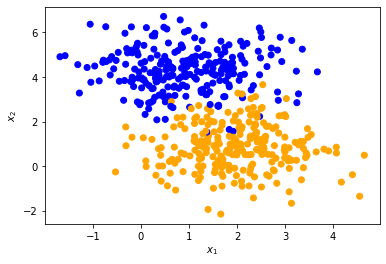

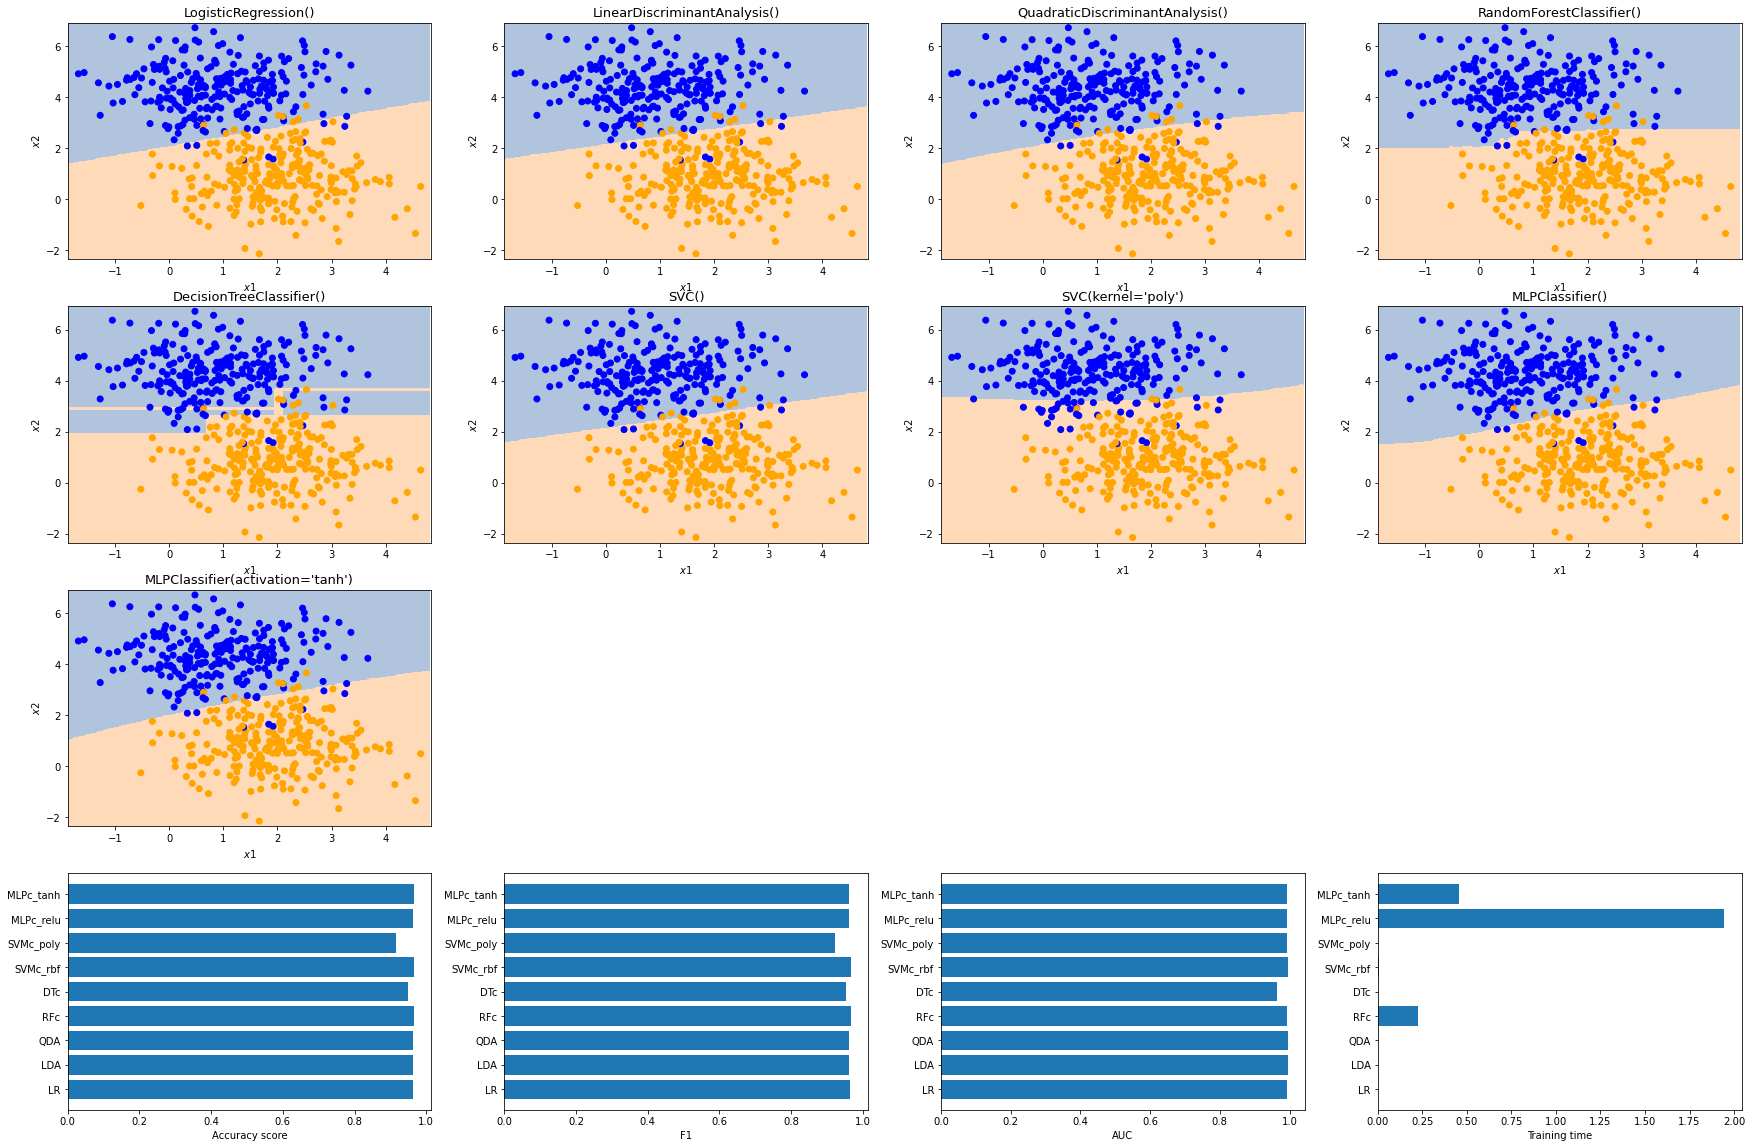

In [5]:
x, y = make_blobs(n_samples=500, centers=2, n_features=2, 
                  cluster_std=1, random_state=0)
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Accuracy: [0.99 0.98 0.96 0.96 0.94]
F1: [0.99029126 0.98076923 0.96153846 0.96       0.94230769]
AUC: [0.99959984 0.99239696 0.9892     0.972      0.9716    ]
Training time: 0.002961874008178711s


LinearDiscriminantAnalysis()
Accuracy: [0.98 0.98 0.9  0.96 0.94]
F1: [0.98076923 0.98076923 0.90909091 0.96       0.94230769]
AUC: [1.         0.99319728 0.9864     0.9716     0.9752    ]
Training time: 0.0s


QuadraticDiscriminantAnalysis()
Accuracy: [0.99 0.98 0.98 0.97 0.96]
F1: [0.99029126 0.98076923 0.98039216 0.96969697 0.96078431]
AUC: [1.        0.9959984 0.9928    0.9716    0.97     ]
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=5, n_estimators=10,
                       random_state=42)
Accuracy: [1.   0.98 0.99 0.97 0.91]
F1: [1.         0.98039216 0.99009901 0.96969697 0.91588785]
AUC: [1.         0.99239696 0.9872     0.9812     0.9732    ]
Training time: 

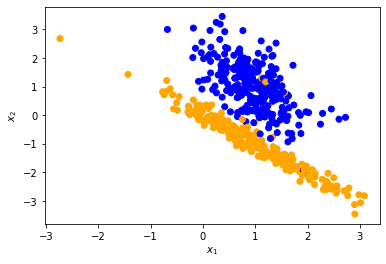

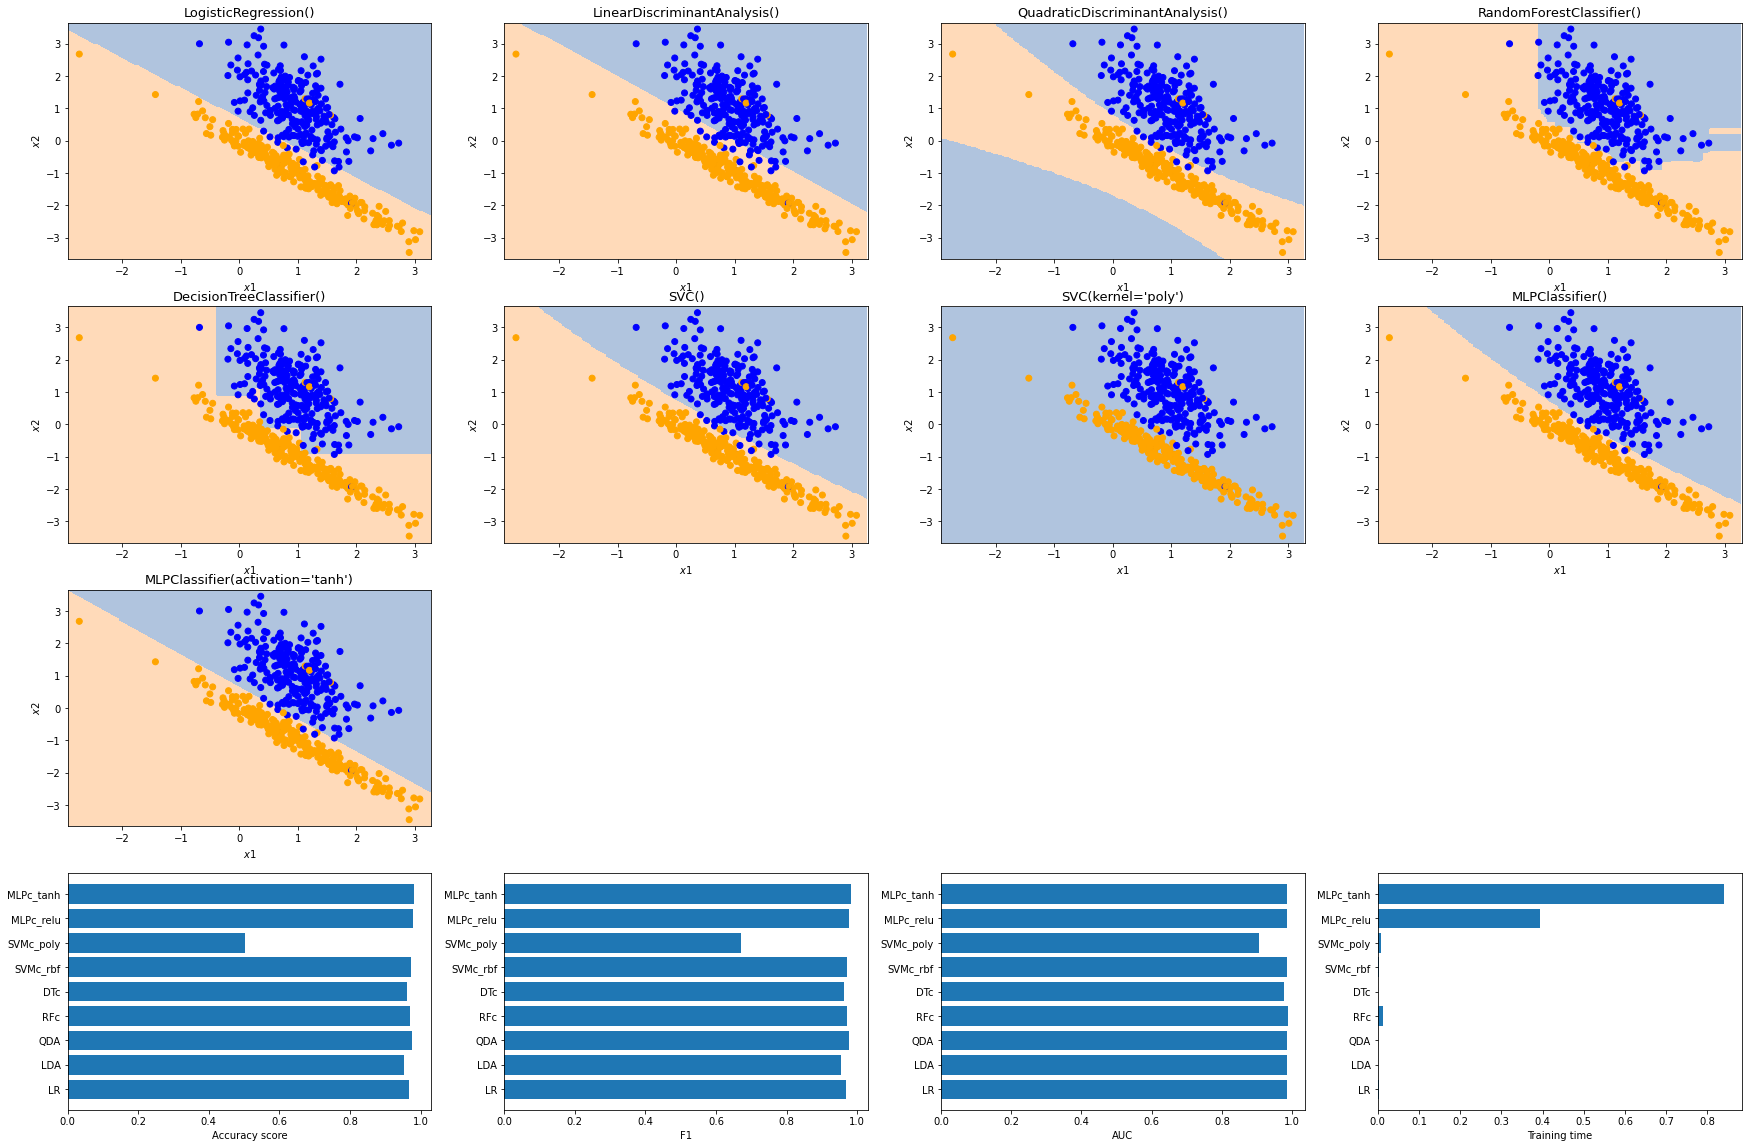

In [6]:
x,y = make_classification(n_samples=500,n_features=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,class_sep=1,
                          random_state=1,weights=(0.5,))

ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Accuracy: [0.99 0.96 0.98 0.97 0.98]
F1: [0.95238095 0.81818182 0.88888889 0.82352941 0.90909091]
AUC: [1.         0.9918284  0.92222222 0.87666667 0.98      ]
Training time: 0.0029916763305664062s


LinearDiscriminantAnalysis()
Accuracy: [0.99 0.96 0.99 0.97 0.97]
F1: [0.95652174 0.81818182 0.94736842 0.84210526 0.86956522]
AUC: [1.         0.9918284  0.92       0.87111111 0.98222222]
Training time: 0.0s


QuadraticDiscriminantAnalysis()
Accuracy: [0.99 0.96 0.99 0.98 0.98]
F1: [0.95652174 0.81818182 0.94736842 0.88888889 0.90909091]
AUC: [0.9979571  0.9959142  0.91666667 0.86777778 0.98111111]
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(n_estimators=50, random_state=42)
Accuracy: [0.98 0.96 0.98 0.98 0.98]
F1: [0.90909091 0.81818182 0.88888889 0.88888889 0.90909091]
AUC: [0.9918284  0.96118488 0.93555556 0.87888889 0.98777778]
Training time: 0.05488085746765137s


Fitting 5 folds for each of 648 can

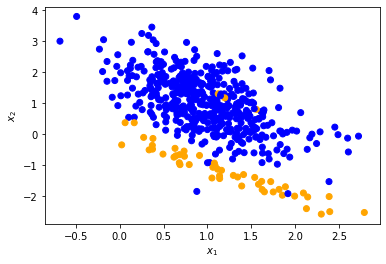

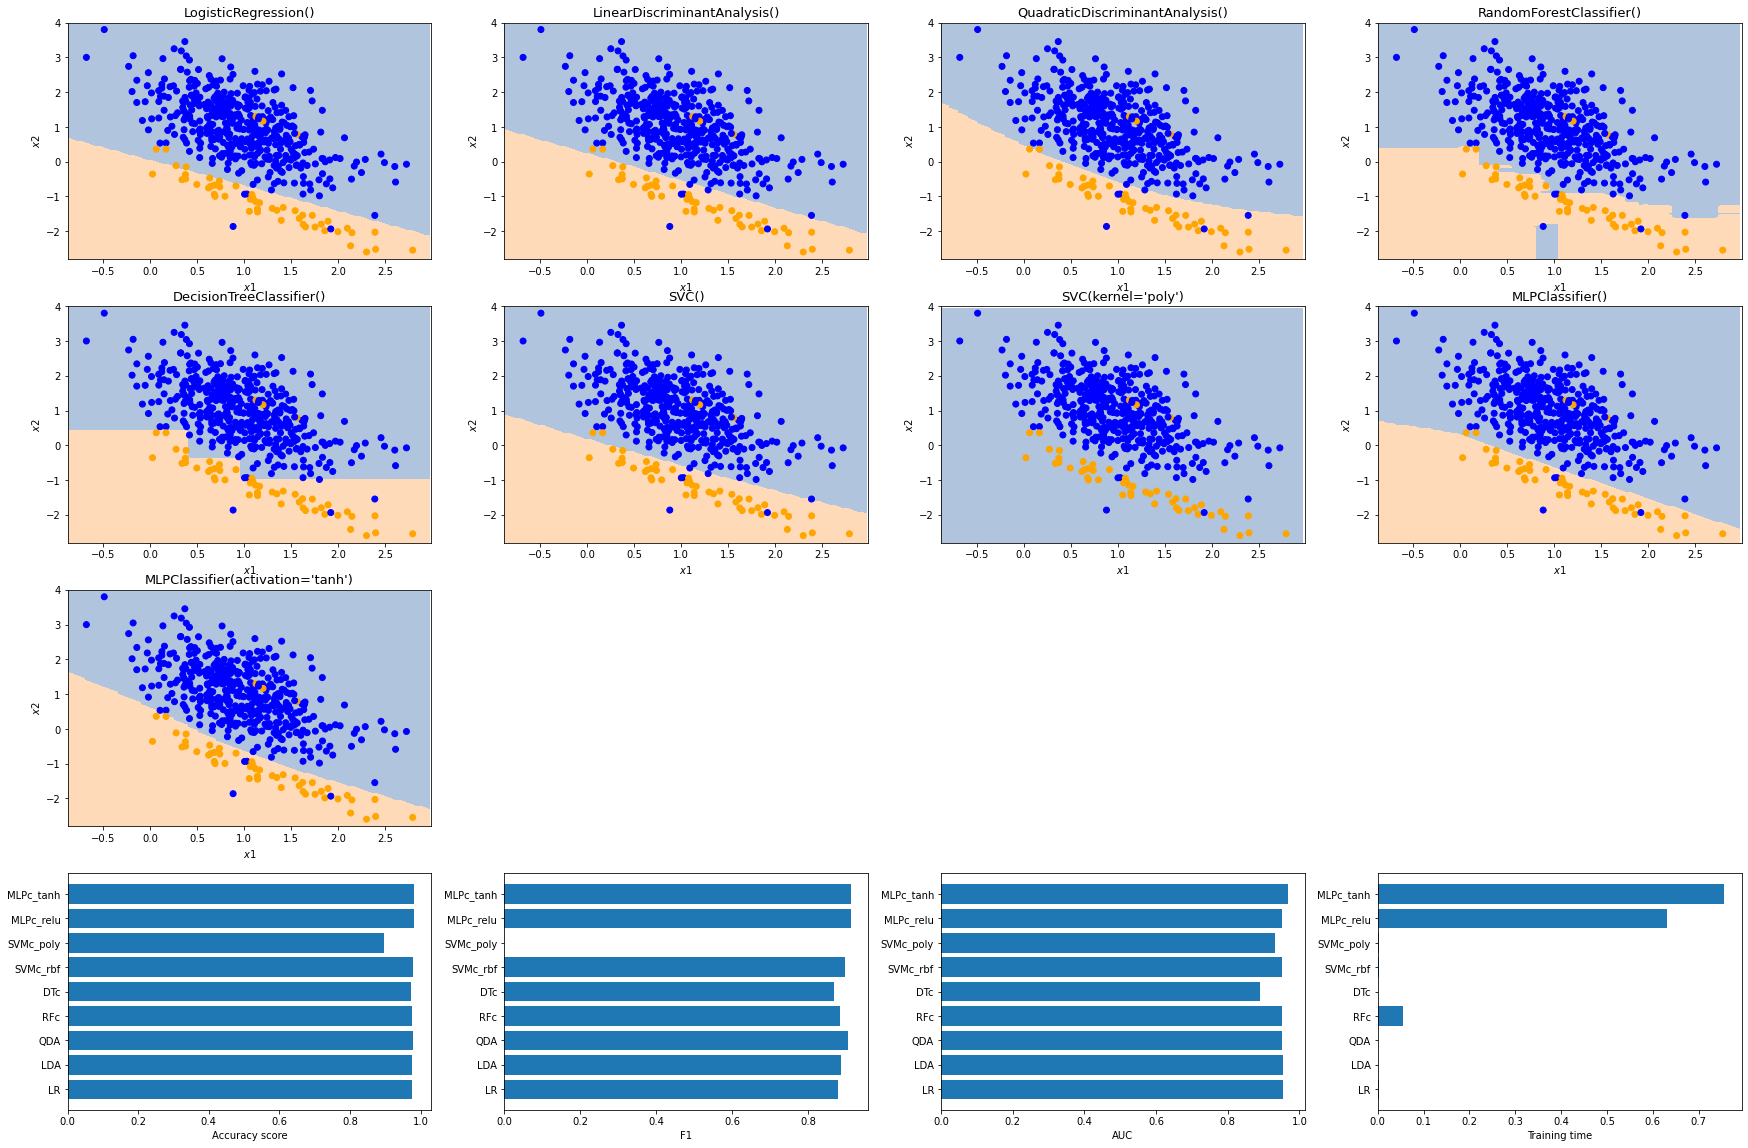

In [7]:
x,y = make_classification(n_samples=500,n_features=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,class_sep=1,
                          random_state=1,weights=(0.9,))
ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Accuracy: [0.37 0.44 0.39 0.46 0.46]
F1: [0.33684211 0.41666667 0.35789474 0.5        0.48076923]
AUC: [0.43   0.4484 0.39   0.3964 0.454 ]
Training time: 0.0019948482513427734s


LinearDiscriminantAnalysis()
Accuracy: [0.37 0.44 0.39 0.46 0.45]
F1: [0.33684211 0.41666667 0.35789474 0.5        0.46601942]
AUC: [0.43   0.4488 0.39   0.3964 0.454 ]
Training time: 0.0009970664978027344s


QuadraticDiscriminantAnalysis()
Accuracy: [0.89 0.92 0.85 0.88 0.8 ]
F1: [0.89108911 0.91666667 0.84536082 0.88235294 0.8       ]
AUC: [0.9576 0.95   0.9416 0.9536 0.9028]
Training time: 0.0s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(criterion='entropy', min_samples_leaf=10,
                       n_estimators=200, random_state=42)
Accuracy: [0.9  0.89 0.87 0.87 0.82]
F1: [0.90196078 0.88659794 0.86597938 0.87619048 0.81632653]
AUC: [0.9504 0.9568 0.9236 0.9296 0.8718]
Training time: 0.26927900314331055s


Fitting 5 folds for each of 648

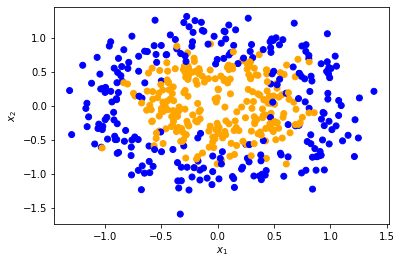

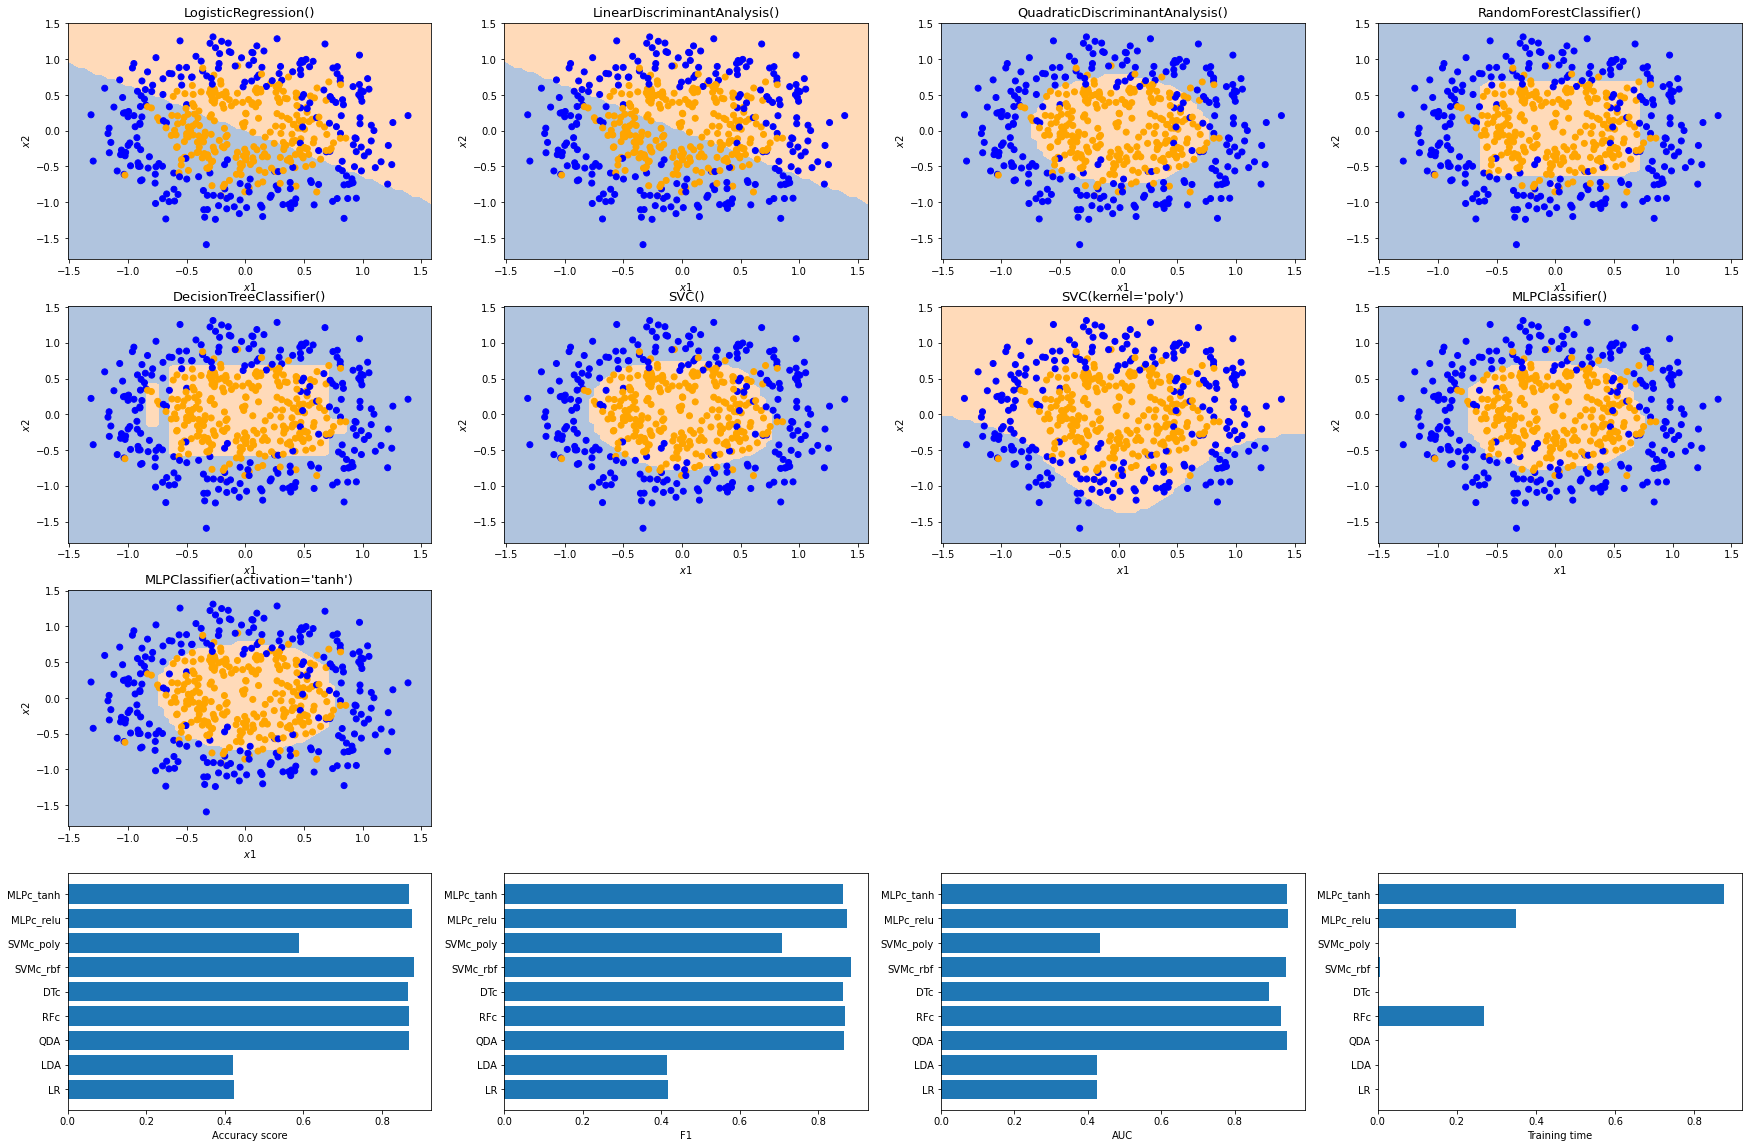

In [33]:
x,y = make_circles(n_samples=500,
                          random_state=1,
                          noise=0.2,
                          factor=0.5)

ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Accuracy: [0.43 0.43 0.39 0.45 0.46]
F1: [0.41237113 0.4        0.38383838 0.46601942 0.48076923]
AUC: [0.43   0.4364 0.3868 0.3924 0.4588]
Training time: 0.001993894577026367s


LinearDiscriminantAnalysis()
Accuracy: [0.43 0.43 0.39 0.45 0.46]
F1: [0.41237113 0.4        0.38383838 0.46601942 0.48076923]
AUC: [0.43   0.4364 0.3872 0.3924 0.4588]
Training time: 0.0009968280792236328s


QuadraticDiscriminantAnalysis()
Accuracy: [1.   1.   1.   1.   0.99]
F1: [1.         1.         1.         1.         0.98989899]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.000997304916381836s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)
Accuracy: [1.   1.   0.97 1.   0.98]
F1: [1.         1.         0.96907216 1.         0.97959184]
AUC: [1. 1. 1. 1. 1.]
Training time: 0.05981183052062988s


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
DecisionTreeClassifier(criterion='en

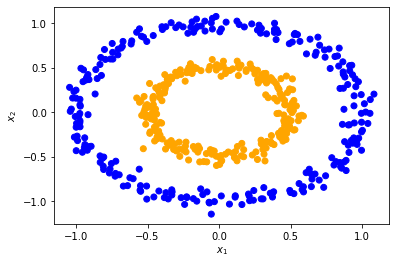

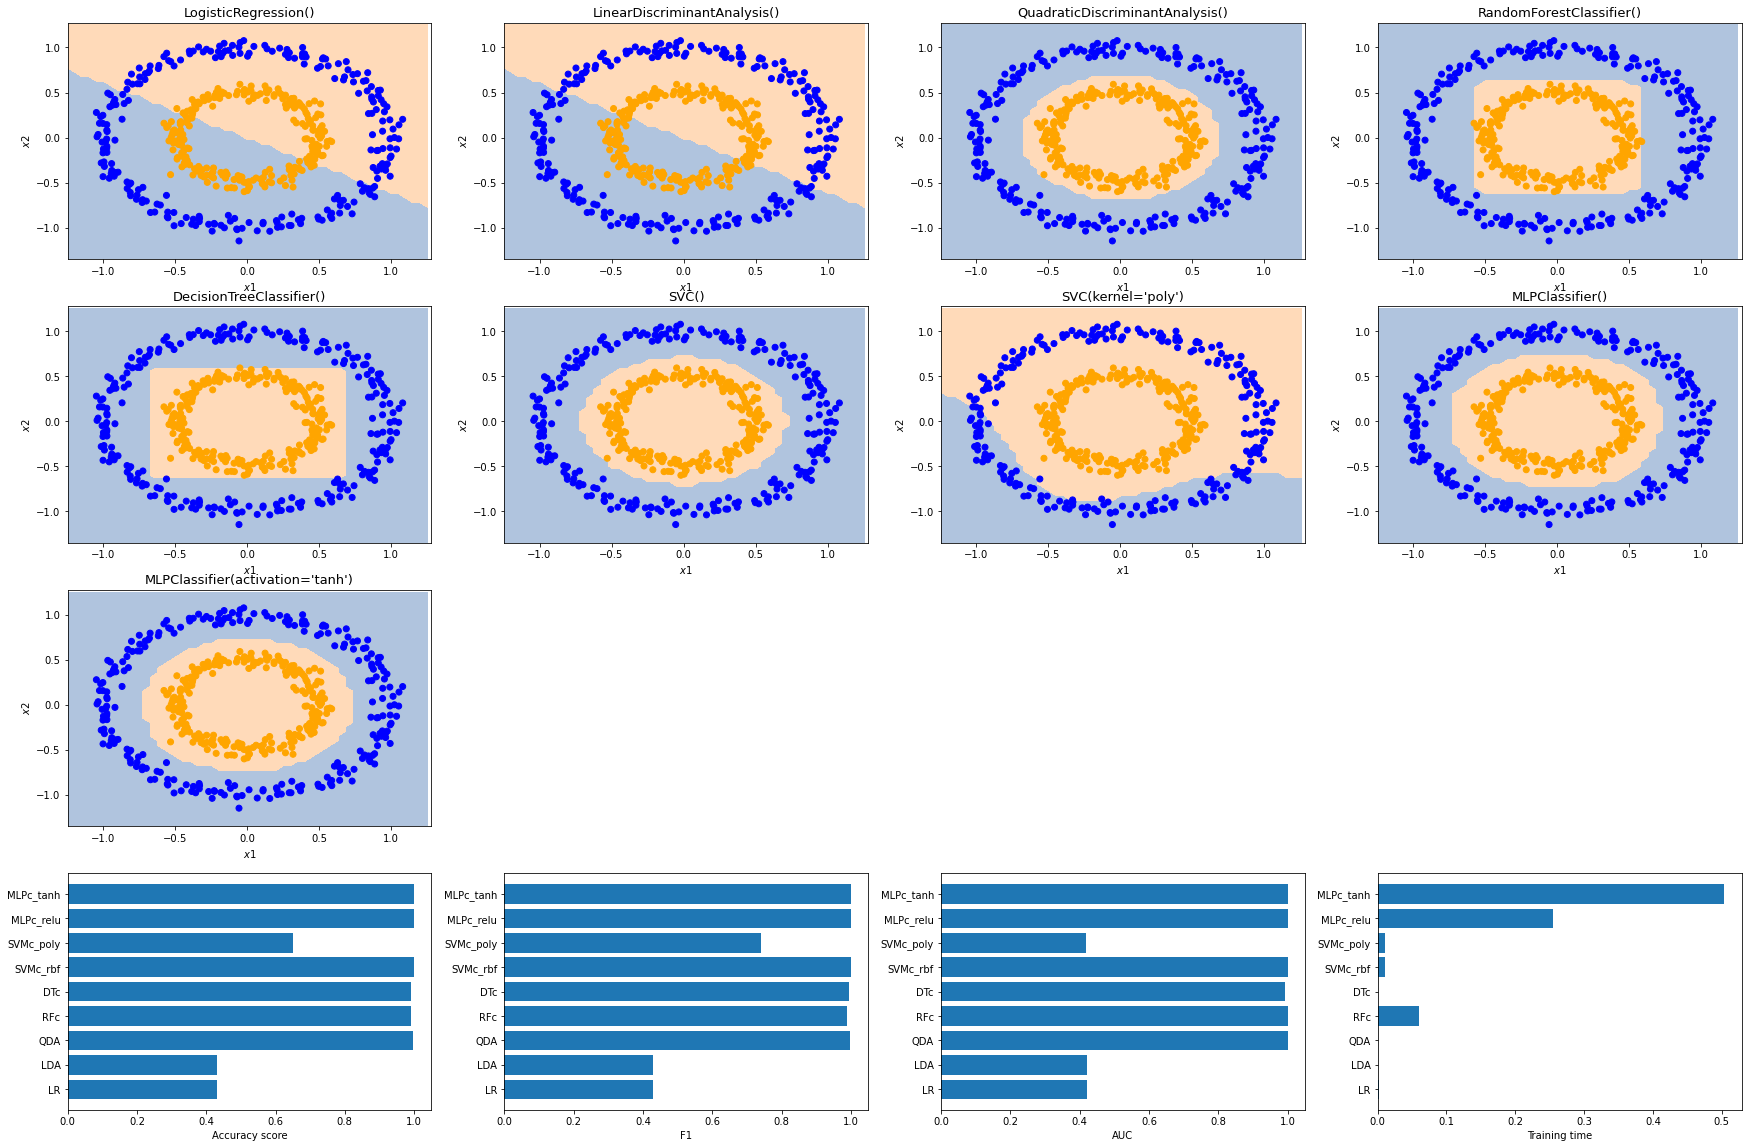

In [32]:
x,y = make_circles(n_samples=500,
                          random_state=1,
                          noise=0.05,
                          factor=0.5)

ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)

LogisticRegression()
Accuracy: [0.492 0.469 0.475 0.462 0.494]
F1: [0.50487329 0.48296008 0.47864945 0.46626984 0.50585938]
AUC: [0.47746  0.453472 0.477272 0.44956  0.49094 ]
Training time: 0.043283700942993164s


LinearDiscriminantAnalysis()
Accuracy: [0.492 0.469 0.475 0.462 0.495]
F1: [0.50487329 0.48296008 0.47864945 0.46626984 0.50731707]
AUC: [0.477404 0.453472 0.477264 0.449572 0.490924]
Training time: 0.036789655685424805s


QuadraticDiscriminantAnalysis()
Accuracy: [0.896 0.895 0.896 0.904 0.878]
F1: [0.89537223 0.89361702 0.89366053 0.90041494 0.8744856 ]
AUC: [0.963988 0.9618   0.96322  0.961752 0.947752]
Training time: 0.004012584686279297s


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
RandomForestClassifier(min_samples_leaf=2, min_samples_split=20,
                       n_estimators=50, random_state=42)
Accuracy: [0.888 0.893 0.895 0.891 0.875]
F1: [0.88822355 0.89267803 0.89340102 0.88978766 0.87309645]
AUC: [0.956058 0.9574   0.954262 0.953    0.937

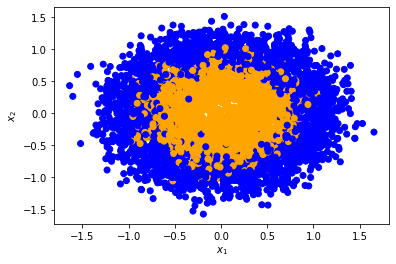

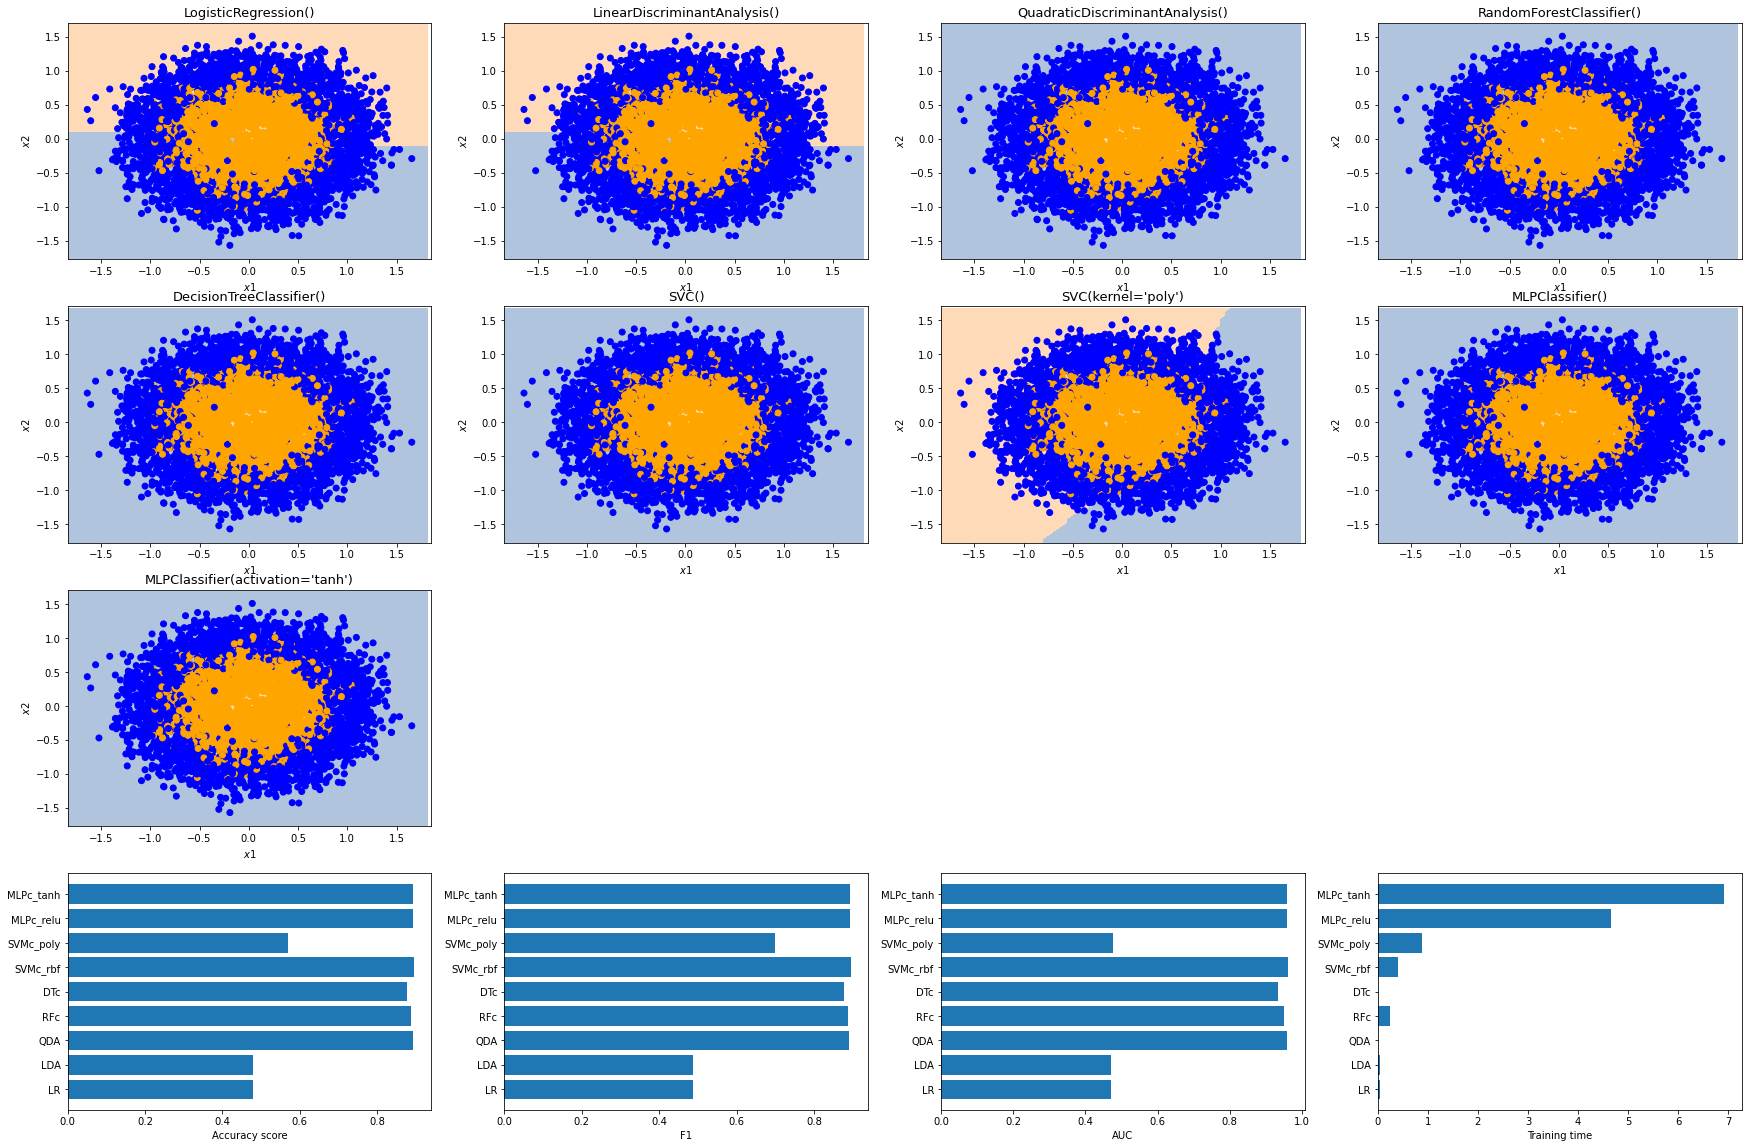

In [4]:
x,y = make_circles(n_samples=5000,
                          random_state=1,
                          noise=0.2,
                          factor=0.5)

ax=plt.axes()
ax.scatter(x[:,0],x[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

Test_models(x, y)